In [36]:
#%pip install handcalcs

In [2]:
# imPORT LIBRARIES 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi, sqrt
import handcalcs.render
import pandas as pd
import json 
# !pip install handcalcs

In [3]:
# CONFIGURATIONS
#help(handcalcs.set_option)
handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)

## Inputs and claculated parameters

In [4]:
with open("../01_llc_tank/04_outputs/inp_datas.json", "r", encoding="utf-8") as f:
    inp_datas = json.load(f)
print("Input datas:")
print("="*20)
display(inp_datas)

with open("../01_llc_tank/04_outputs/out_results.json", "r", encoding="utf-8") as f:
    out_datas = json.load(f)
print("Output datas:")
print("="*20)
display(out_datas)


# Load variables 
for key, value in inp_datas.items():
    globals()[key] = value
for key, value in out_datas.items():
    globals()[key] = value

Input datas:


{'V_In_min': 360.0,
 'V_In_nom': 380.0,
 'V_In_max': 400.0,
 'Vo_min': 42.0,
 'Vo_nom': 48.0,
 'Vo_max': 54.0,
 'Power': 1200.0,
 'f_nom': 100000.0}

Output datas:


{'Lnc': 3.0,
 'Qec': 0.55,
 'Cr_nF': 116.209,
 'n': 4.0,
 'Lr_uH': 21.797,
 'Lm_uH': 65.392,
 'fsw_min': 60170.0,
 'fsw_max': 156220.0,
 'Im_rms': 6.992,
 'Io': 25.0,
 'Ioe_rms': 7.636,
 'Ios_rms': 30.545,
 'Ir_rms': 10.354,
 'L_second_uH': 4.087,
 'Re_nom': 24.901,
 'Re_110': 22.637,
 'Cr': 1.16209e-07,
 'Lr': 2.1796999999999998e-05,
 'Lm': 6.539199999999999e-05}

In [6]:
arr=[]
for c in ["1","3","2"]:
    
    path = r"..\..\03_components\05_Mosfet\01_Primary\MouserSearchDownloadMosfet"+c+".csv"
 
    df = pd.read_csv(path)
    arr.append(df)
df= pd.concat(arr, axis = 0)
df = df[['Mfr Part Number', 'Mfr.',
       'Availability', 'Pricing', 
       'Technology', 'Mounting Style', 'Package/Case', 'Transistor Polarity',
        'Vds - Drain-Source Breakdown Voltage',
       'Id - Continuous Drain Current', 'Rds On - Drain-Source Resistance',
       'Vgs th - Gate-Source Threshold Voltage',
       'Qg - Gate Charge',  'Pd - Power Dissipation',
        ]]

In [5]:
list(df["Technology"].unique())

['Si']

In [6]:
list(df["Mounting Style"].unique())

['Through Hole']

In [7]:
list(df["Transistor Polarity"].unique())

['N-Channel']

In [14]:
cols = list(df.columns)
for c in ["Technology", "Mounting Style", 
                             "Transistor Polarity"]:
    cols.remove(c)
df2= df[cols]

In [15]:
df3 = df2.copy() 
df3.loc[:,  "Pricing"] = df2["Pricing"].str.replace('="', "").str.replace(' €"', "").str.replace(',', ".")
df3.rename(columns={"Pricing": "Pricing €"}, inplace=True)

df3.loc[:,  "Vds - Drain-Source Breakdown Voltage"] = df2["Vds - Drain-Source Breakdown Voltage"].str.replace(' V', "")
df3.rename(columns={"Vds - Drain-Source Breakdown Voltage": "Vds (V)"}, inplace=True)


df3.loc[:,  "Id - Continuous Drain Current"] = df2["Id - Continuous Drain Current"].str.replace('="', "").str.replace(' A"', "")
df3.rename(columns={"Id - Continuous Drain Current": "Id A"}, inplace=True)


df3.loc[:,  "Rds On - Drain-Source Resistance"] = df2["Rds On - Drain-Source Resistance"].str.replace(' mOhms', "")
df3.rename(columns={"Rds On - Drain-Source Resistance": "Rds (mOhms)"}, inplace=True)

df3.loc[:,  "Vgs th - Gate-Source Threshold Voltage"] = df2["Vgs th - Gate-Source Threshold Voltage"].str.replace(' V', "")
df3.rename(columns={"Vgs th - Gate-Source Threshold Voltage": "Vgs th (V)"}, inplace=True)


df3.loc[:,  "Qg - Gate Charge"] = df2["Qg - Gate Charge"].str.replace(' nC', "")
df3.rename(columns={"Qg - Gate Charge": "Qg (nC)"}, inplace=True)


df3.loc[:,  "Pd - Power Dissipation"] = df2["Pd - Power Dissipation"].str.replace(' W', "")
df3.rename(columns={"Pd - Power Dissipation": "Pd - Power Dissipation (W)"}, inplace=True)

df3

,Mfr Part Number,Mfr.,Availability,Pricing €,Package/Case,Vds (V),Id A,Rds (mOhms),Vgs th (V),Qg (nC),Pd - Power Dissipation (W)
0,IPW60R099P7XKSA1,Infineon Technologies,1 347 In Stock,3.67,TO-247-3,600,31,77,3,45,117
1,IPZA60R080P7XKSA1,Infineon Technologies,174 In Stock,4.03,TO-247-4,600,37,69,3,51,129
2,IPZA60R099P7XKSA1,Infineon Technologies,310 In Stock,4.19,TO-247-4,600,31,77,3,45,117
3,STW65N60DM6,STMicroelectronics,587 In Stock,4.59,TO-247-3,600,38,71,3.25,54,250
4,STW48N60DM2,STMicroelectronics,477 In Stock,4.73,TO-247-3,600,40,65,3,70,300
...,...,...,...,...,...,...,...,...,...,...,...
20,STW48NM60N,STMicroelectronics,1 186 In Stock,6.89,TO-247-3,600,39,70,2,124,255
21,FCH47N60-F133,onsemi / Fairchild,413 In Stock,6.90,TO-247-3,600,47,70,3,270,417
22,STWA75N60M6,STMicroelectronics,496 In Stock,6.92,TO-247-3,600,72,36,3.25,106,446
23,IPZ65R065C7,Infineon Technologies,221 In Stock,6.94,TO-247-4,650,33,58,3,64,171


In [16]:
for c in [ 'Pricing €',
       'Vds (V)', 'Id A', 'Rds (mOhms)', 'Vgs th (V)', 'Qg (nC)',
       'Pd - Power Dissipation (W)']:
    df3.loc[:,c]= df3[c].astype("float32")

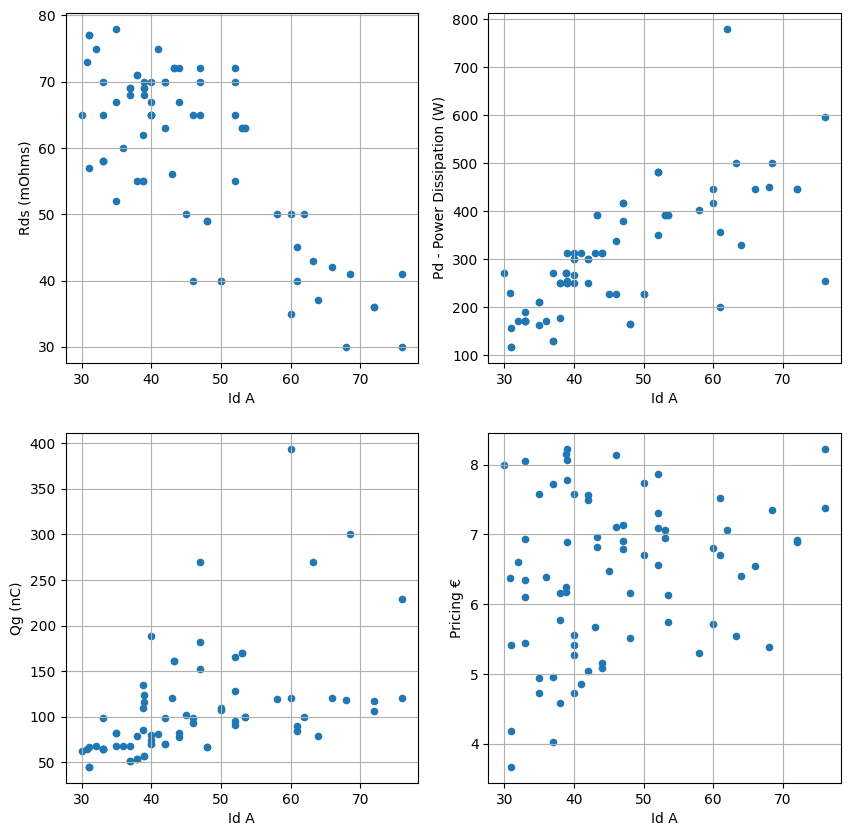

In [17]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs=axs.flatten()

ax = axs[0]
df3.plot(x="Id A", y="Rds (mOhms)", kind = "scatter", ax = ax)
ax.grid()

ax = axs[1]
df3.plot(x="Id A", y="Pd - Power Dissipation (W)", kind = "scatter", ax = ax)
ax.grid()

ax = axs[2]
df3.plot(x="Id A" , y="Qg (nC)", kind = "scatter", ax = ax)
ax.grid()

ax = axs[3]
df3.plot(x="Id A" , y="Pricing €", kind = "scatter", ax = ax)
ax.grid()

	

In [18]:
dic1 ={'Mfr Part Number': 'SPW17N80C3A',
'renamrk': 'DCDC nissan 2kW',
'Mfr.': 'Infineon',
'Pricing €': 'NA',
'Package/Case': 'TO-247-3',
'Vds (V)': 800,
'Id A': 17,
'Rds (mOhms)': 290,
'Vgs th (V)': 3,
'Qg (nC)': 88,
'Pd - Power Dissipation (W)': 208,
'Rise Time ns': 15,
'Typical Turn-Off Delay Time ns': 72 ,
'Typical Turn-On Delay Time ns':25,
'Reverse diode dv /dt (v/ns)': 4,
'Thermal resistance, junction - case (K/W)': 0.55,
'Effective output capacitance, energy related (pF)': 72,
'Diode forward voltage (max V)': 1.2}
dic2= {'Mfr Part Number': 'STW48N60DM2',
'renamrk': 'LLC condidate',
'Mfr.': 'STMicroelectronics',
'Pricing €': 4.7,
'Package/Case': 'TO-247-3',
'Vds (V)': 600,
'Id A': 40,
'Rds (mOhms)': 65,
'Vgs th (V)': 3,
'Qg (nC)': 70,
'Pd - Power Dissipation (W)': 300,
'Rise Time ns': 25,
'Typical Turn-Off Delay Time ns': 131,
'Typical Turn-On Delay Time ns': 25,
'Reverse diode dv /dt (v/ns)': 50,
'Thermal resistance, junction - case (K/W)': 0.42,
'Effective output capacitance, energy related (pF)': 258 ,
'Diode forward voltage (max V)': 1}
dic3={'Mfr Part Number': 'SIHG039N60EF-GE3',
'renamrk': 'LLC condidate',
'Mfr.': 'Vishay / Siliconix',
'Pricing €': 7.52,
'Package/Case': 'TO-247-3',
'Vds (V)': 600.0,
'Id A': 61.0,
'Rds (mOhms)': 40.0,
'Vgs th (V)': 3.0,
'Qg (nC)': 84.0,
'Pd - Power Dissipation (W)': 357.0,
'Rise Time ns':179,
'Typical Turn-Off Delay Time ns': 152,
'Typical Turn-On Delay Time ns': 109,
'Reverse diode dv /dt (v/ns)': 50,
'Thermal resistance, junction - case (K/W)': 2.9,
'Effective output capacitance, energy related (pF)': 139,
'Diode forward voltage (max V)': 1.2}
df_ = pd.DataFrame([dic1, dic2, dic3])
df_= df_.set_index("Mfr Part Number")
df_.T

Mfr Part Number,SPW17N80C3A,STW48N60DM2,SIHG039N60EF-GE3
renamrk,DCDC nissan 2kW,LLC condidate,LLC condidate
Mfr.,Infineon,STMicroelectronics,Vishay / Siliconix
Pricing €,NA,4.7,7.52
Package/Case,TO-247-3,TO-247-3,TO-247-3
Vds (V),800.0,600.0,600.0
Id A,17.0,40.0,61.0
Rds (mOhms),290.0,65.0,40.0
Vgs th (V),3.0,3.0,3.0
Qg (nC),88.0,70.0,84.0
Pd - Power Dissipation (W),208.0,300.0,357.0


In [19]:
dic2= {'Mfr Part Number': 'STW48N60DM2',
 'Mfr.': 'STMicroelectronics',
 'Availability': '477  In Stock',
 'Pricing €': 4.7,
 'Package/Case': 'TO-247-3',
 'Vds (V)': 600,
 'Id A': 40,
 'Rds (mOhms)': 65,
 'Vgs th (V)': 3,
 'Qg (nC)': 70,
 'Pd - Power Dissipation (W)': 300}

In [20]:
s= df3["Qg (nC)"]
m1 = s<=70

s= df3["Rds (mOhms)"]
m2 = s<=70

df3[m1 & m2]

,Mfr Part Number,Mfr.,Availability,Pricing €,Package/Case,Vds (V),Id A,Rds (mOhms),Vgs th (V),Qg (nC),Pd - Power Dissipation (W)
1,IPZA60R080P7XKSA1,Infineon Technologies,174 In Stock,4.03,TO-247-4,600.0,37.0,69.0,3.0,51.0,129.0
4,STW48N60DM2,STMicroelectronics,477 In Stock,4.73,TO-247-3,600.0,40.0,65.0,3.0,70.0,300.0
7,IPW60R060C7XKSA1,Infineon Technologies,410 In Stock,4.94,TO-247-3,600.0,35.0,52.0,3.0,68.0,162.0
8,IPW60R080P7XKSA1,Infineon Technologies,2 778 In Stock,4.96,TO-247-3,600.0,37.0,69.0,3.0,51.0,129.0
9,STW48N60M2,STMicroelectronics,987 In Stock,5.04,TO-247-3,600.0,42.0,70.0,2.0,70.0,300.0
12,STWA48N60DM2,STMicroelectronics,560 In Stock,5.27,TO-247-3,600.0,40.0,65.0,3.0,70.0,300.0
16,IPW60R070CFD7XKSA1,Infineon Technologies,3 559 In Stock,5.41,TO-247-3,600.0,31.0,57.0,3.5,67.0,156.0
18,IPZ65R065C7XKSA1,Infineon Technologies,437 In Stock,5.45,TO-247-4,650.0,33.0,58.0,3.0,64.0,171.0
19,IPW60R060P7XKSA1,Infineon Technologies,1 063 In Stock,5.51,TO-247-3,600.0,48.0,49.0,3.0,67.0,164.0
9,STWA48N60M2,STMicroelectronics,93 In Stock,7.49,TO-247-3,650.0,42.0,70.0,2.0,70.0,300.0


In [21]:
#IPW60R060C7XKSA1
#https://www.mouser.fr/datasheet/2/196/Infineon_IPW60R060C7_DS_v02_00_EN-1731945.pdf
#https://www.mouser.fr/ProductDetail/Infineon-Technologies/IPW60R060C7XKSA1?qs=QIiuLP2W41BeappdMvA3rg%3D%3D

#### Model

In [21]:
%%render 
Vgs1 = 5 # V
Id1 = 18 # A
Vgs2 = 6 # V
Id2 = 71 # A
Ciss_pF = 2850 # pF
Qgd_nC = 23 # nC
DV_Qgd = 400-10
name = "IPW60R060C7"
#Coss

<IPython.core.display.Latex object>

In [22]:
%%render 
Crss_pF = Cgd_pF = 1e3*Qgd_nC/DV_Qgd # pF

<IPython.core.display.Latex object>

In [23]:
%%render 
#Spice model of nMos .model IRFFF NMOS(LEVEL=1 LAMBDA=0.0 VTO=4.01 KP=1.23 CGSO=2.45e-6 CGDO=15e-7)

CGSO_pF = Cgs_pF  = Ciss_pF - Crss_pF
CGDO_pF = Crss_pF

<IPython.core.display.Latex object>

In [24]:
%%render 
VT = (Vgs1*sqrt(Id2)-Vgs2*sqrt(Id1))/(sqrt(Id2)-sqrt(Id1))

<IPython.core.display.Latex object>

In [25]:
%%render 
Kp = ((sqrt(2*Id1)-sqrt(2*Id2))/(Vgs1-Vgs2))**2

<IPython.core.display.Latex object>

In [26]:
%%render 
Vgs = 10
Vds1= 5 
Id1= 88
Vds2= 2
Id2= 38


<IPython.core.display.Latex object>

In [27]:
%%render 
Id= (Id1+Id2)/2
Delta_VdS= Vds1-Vds2
Delta_Id = Id1-Id2
Lambda = (Delta_Id/Delta_VdS)/Id

<IPython.core.display.Latex object>

In [28]:
%%render
Rds_on_mohm = 60

<IPython.core.display.Latex object>

In [29]:
%%render
RD= Rds_on_mohm/3
RS= 2*Rds_on_mohm/3

<IPython.core.display.Latex object>

In [39]:
%%render
#trr ≈ td(off) + tf
# Turn-off delay time td(off) = 79 ns
# Fall time tf = 4 ns 
Td_off_ns = 79
Tf_ns= 4
trr_ns = Td_off_ns +Tf_ns

<IPython.core.display.Latex object>

In [43]:
print(f".model {name} NMOS(LEVEL=1 LAMBDA=0.0 VTO={VT:.3e} KP={Kp:.3e} CGSO={CGSO_pF*1e-12:.4e}\n+ CGDO={CGDO_pF*1e-12:.4e} LAMBDA={Lambda:.4e} \n+RD={RD*1e-3:.4e} RS={RS*1e-3:.4e} TT={trr_ns*1e-9:.4e} )")

.model IPW60R060C7 NMOS(LEVEL=1 LAMBDA=0.0 VTO=3.986e+00 KP=3.500e+01 CGSO=2.7910e-09
+ CGDO=5.8974e-11 LAMBDA=2.6455e-01 
+RD=2.0000e-02 RS=4.0000e-02 TT=8.3000e-08 )


## Dead time to ZVS 

<img src="../01_llc_tank/03_figs/tdeadZVS.png" style="width:10cm;">

$ t_{\text{dead}} \geq 16 \cdot C_{\text{eq}} \cdot f_{\text{sw}} \cdot L_m $


In [7]:
fsw_min = 60170

In [10]:
%%render 
Co_pF= 101 # pF
fsw_max = 156 # kHz
Tsw_min  =1e6/fsw_max # ns
Lm_uH = 65.392 # uH
t_dead_min_ns = 16*(Co_pF*1e-12)*(fsw_max*1e3)*(Lm_uH*1e-6)*1e9 # ns

<IPython.core.display.Latex object>

# Secondary

In [8]:
# Mouser 

https://www.mouser.lu/c/semiconductors/discrete-semiconductors/transistors/mosfets/?id%20-%20continuous%20drain%20current=100%20A~~240%20A&package%20%2F%20case=TO-247-3&vds%20-%20drain-source%20breakdown%20voltage=150%20V&instock=y&rp=semiconductors%2Fdiscrete-semiconductors%2Ftransistors%2Fmosfets%7C~Id%20-%20Continuous%20Drain%20Current

In [5]:
import numpy as np
import pandas as pd

In [6]:
arr=[]
for c in  ["1","3","2"]: #["3"]: #
    
    path = r"..\..\03_components\05_Mosfet\02_Secondary\MouserSearchDownload_V"+c+".csv"
 
    df = pd.read_csv(path)
    arr.append(df)
df= pd.concat(arr, axis = 0)
df = df[['Mfr Part Number', 'Mfr.',
       'Availability', 'Pricing', 
       'Technology', 'Mounting Style', 'Package/Case', 'Transistor Polarity',
        'Vds - Drain-Source Breakdown Voltage',
       'Id - Continuous Drain Current', 'Rds On - Drain-Source Resistance',
       'Vgs th - Gate-Source Threshold Voltage',
       'Qg - Gate Charge',  'Pd - Power Dissipation',
        ]]

In [8]:
df = df.dropna()

In [9]:
df

,Mfr Part Number,Mfr.,Availability,Pricing,Technology,Mounting Style,Package/Case,Transistor Polarity,Vds - Drain-Source Breakdown Voltage,Id - Continuous Drain Current,Rds On - Drain-Source Resistance,Vgs th - Gate-Source Threshold Voltage,Qg - Gate Charge,Pd - Power Dissipation
0,SUG80050E-GE3,Vishay Semiconductors,912 In Stock,"=""4,79 €""",Si,Through Hole,TO-247-3,N-Channel,150 V,"=""100 A""",4.5 mOhms,2 V,165 nC,500 W
1,IXFR180N15P,IXYS,Non-Stocked Lead-Time 39 Weeks,"=""12,43 €""",Si,Through Hole,TO-247-3,N-Channel,150 V,"=""100 A""",13 mOhms,5 V,240 nC,300 W
0,IXFH120N15P,IXYS,402 In Stock,"8,89 €",Si,Through Hole,TO-247-3,N-Channel,150 V,120 A,16 mOhms,3 V,150 nC,600 W
1,IXTH150N15X4,IXYS,196 In Stock,"10,56 €",Si,Through Hole,TO-247-3,N-Channel,150 V,150 A,7.2 mOhms,2.5 V,105 nC,480 W
2,IXTH240N15X4,IXYS,250 In Stock,"11,78 €",Si,Through Hole,TO-247-3,N-Channel,150 V,240 A,4.4 mOhms,4.5 V,195 nC,940 W
3,IXFH160N15T2,IXYS,270 In Stock,"7,79 €",Si,Through Hole,TO-247-3,N-Channel,150 V,160 A,9 mOhms,4.5 V,253 nC,880 W
4,AUIRFP4568,Infineon Technologies,1.378 In Stock,"10,55 €",Si,Through Hole,TO-247-3,N-Channel,150 V,171 A,4.8 mOhms,3 V,227 nC,517 W
5,FDH055N15A,onsemi / Fairchild,1.249 In Stock,"6,29 €",Si,Through Hole,TO-247-3,N-Channel,150 V,167 A,4.8 mOhms,4 V,92 nC,429 W
6,HUF75852G3,onsemi / Fairchild,843 In Stock,"11,40 €",Si,Through Hole,TO-247-3,N-Channel,150 V,75 A,16 mOhms,2 V,480 nC,500 W
7,IRF150P221AKMA1,Infineon Technologies,1.241 In Stock,"6,18 €",Si,Through Hole,TO-247-3,N-Channel,150 V,186 A,4.5 mOhms,4.6 V,80 nC,341 W


In [10]:
cols = list(df.columns)
for c in ["Technology", "Mounting Style", 
                             "Transistor Polarity"]:
    cols.remove(c)
df2= df[cols]

In [11]:
df3 = df2.copy() 
df3.loc[:,  "Pricing"] = df2["Pricing"].str.replace('="', "").str.replace(' €"', "").str.replace(',', ".")
df3.loc[:,  "Pricing"] = df3["Pricing"].str.replace(' €', "").str.replace('="', "").str.replace('"', "")
df3.loc[:,  "Pricing"] = df3["Pricing"].str.replace('€', "").str.replace('"', "").str.replace('=', "")
df3.loc[:,  "Pricing"] = df3["Pricing"].str.replace(',', ".")


df3.rename(columns={"Pricing": "Pricing €"}, inplace=True)

df3.loc[:,  "Vds - Drain-Source Breakdown Voltage"] = df2["Vds - Drain-Source Breakdown Voltage"].str.replace(' V', "")
df3.rename(columns={"Vds - Drain-Source Breakdown Voltage": "Vds (V)"}, inplace=True)


df3.loc[:,  "Id - Continuous Drain Current"] = df2["Id - Continuous Drain Current"].str.replace('="', "").str.replace(' A"', "")
df3.rename(columns={"Id - Continuous Drain Current": "Id A"}, inplace=True)
df3.loc[:,  "Id A"] = df3["Id A"].str.replace('A', "")


df3.loc[:,  "Rds On - Drain-Source Resistance"] = df2["Rds On - Drain-Source Resistance"].str.replace(' mOhms', "")
df3.rename(columns={"Rds On - Drain-Source Resistance": "Rds (mOhms)"}, inplace=True)

df3.loc[:,  "Vgs th - Gate-Source Threshold Voltage"] = df2["Vgs th - Gate-Source Threshold Voltage"].str.replace(' V', "")
df3.rename(columns={"Vgs th - Gate-Source Threshold Voltage": "Vgs th (V)"}, inplace=True)


df3.loc[:,  "Qg - Gate Charge"] = df2["Qg - Gate Charge"].str.replace(' nC', "")
df3.rename(columns={"Qg - Gate Charge": "Qg (nC)"}, inplace=True)


df3.loc[:,  "Pd - Power Dissipation"] = df2["Pd - Power Dissipation"].str.replace(' W', "")
df3.rename(columns={"Pd - Power Dissipation": "Pd - Power Dissipation (W)"}, inplace=True)

df3

,Mfr Part Number,Mfr.,Availability,Pricing €,Package/Case,Vds (V),Id A,Rds (mOhms),Vgs th (V),Qg (nC),Pd - Power Dissipation (W)
0,SUG80050E-GE3,Vishay Semiconductors,912 In Stock,4.79,TO-247-3,150,100,4.5,2,165,500
1,IXFR180N15P,IXYS,Non-Stocked Lead-Time 39 Weeks,12.43,TO-247-3,150,100,13,5,240,300
0,IXFH120N15P,IXYS,402 In Stock,8.89,TO-247-3,150,120,16,3,150,600
1,IXTH150N15X4,IXYS,196 In Stock,10.56,TO-247-3,150,150,7.2,2.5,105,480
2,IXTH240N15X4,IXYS,250 In Stock,11.78,TO-247-3,150,240,4.4,4.5,195,940
3,IXFH160N15T2,IXYS,270 In Stock,7.79,TO-247-3,150,160,9,4.5,253,880
4,AUIRFP4568,Infineon Technologies,1.378 In Stock,10.55,TO-247-3,150,171,4.8,3,227,517
5,FDH055N15A,onsemi / Fairchild,1.249 In Stock,6.29,TO-247-3,150,167,4.8,4,92,429
6,HUF75852G3,onsemi / Fairchild,843 In Stock,11.40,TO-247-3,150,75,16,2,480,500
7,IRF150P221AKMA1,Infineon Technologies,1.241 In Stock,6.18,TO-247-3,150,186,4.5,4.6,80,341


In [12]:
for c in [ 'Pricing €',
       'Vds (V)', 'Id A', 'Rds (mOhms)', 'Vgs th (V)', 'Qg (nC)',
       'Pd - Power Dissipation (W)']:
    df3.loc[:,c]= df3[c].astype("float32")

In [13]:
df3

,Mfr Part Number,Mfr.,Availability,Pricing €,Package/Case,Vds (V),Id A,Rds (mOhms),Vgs th (V),Qg (nC),Pd - Power Dissipation (W)
0,SUG80050E-GE3,Vishay Semiconductors,912 In Stock,4.79,TO-247-3,150.0,100.0,4.5,2.0,165.0,500.0
1,IXFR180N15P,IXYS,Non-Stocked Lead-Time 39 Weeks,12.43,TO-247-3,150.0,100.0,13.0,5.0,240.0,300.0
0,IXFH120N15P,IXYS,402 In Stock,8.89,TO-247-3,150.0,120.0,16.0,3.0,150.0,600.0
1,IXTH150N15X4,IXYS,196 In Stock,10.56,TO-247-3,150.0,150.0,7.2,2.5,105.0,480.0
2,IXTH240N15X4,IXYS,250 In Stock,11.78,TO-247-3,150.0,240.0,4.4,4.5,195.0,940.0
3,IXFH160N15T2,IXYS,270 In Stock,7.79,TO-247-3,150.0,160.0,9.0,4.5,253.0,880.0
4,AUIRFP4568,Infineon Technologies,1.378 In Stock,10.55,TO-247-3,150.0,171.0,4.8,3.0,227.0,517.0
5,FDH055N15A,onsemi / Fairchild,1.249 In Stock,6.29,TO-247-3,150.0,167.0,4.8,4.0,92.0,429.0
6,HUF75852G3,onsemi / Fairchild,843 In Stock,11.4,TO-247-3,150.0,75.0,16.0,2.0,480.0,500.0
7,IRF150P221AKMA1,Infineon Technologies,1.241 In Stock,6.18,TO-247-3,150.0,186.0,4.5,4.6,80.0,341.0


In [14]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs=axs.flatten()

ax = axs[0]
df3.plot(x="Id A", y="Rds (mOhms)", kind = "scatter", ax = ax)
ax.grid()

ax = axs[1]
df3.plot(x="Id A", y="Pd - Power Dissipation (W)", kind = "scatter", ax = ax)
ax.grid()

ax = axs[2]
df3.plot(x="Id A" , y="Qg (nC)", kind = "scatter", ax = ax)
ax.grid()

ax = axs[3]
df3.plot(x="Id A" , y="Pricing €", kind = "scatter", ax = ax)
ax.grid()

	

NameError: name 'plt' is not defined

In [17]:
s= df3["Qg (nC)"]
m1 = s<=110

s= df3["Rds (mOhms)"]
m2 = s<=10

df3[m1 & m2]

,Mfr Part Number,Mfr.,Availability,Pricing €,Package/Case,Vds (V),Id A,Rds (mOhms),Vgs th (V),Qg (nC),Pd - Power Dissipation (W)
1,IXTH150N15X4,IXYS,196 In Stock,10.56,TO-247-3,150.0,150.0,7.2,2.5,105.0,480.0
5,FDH055N15A,onsemi / Fairchild,1.249 In Stock,6.29,TO-247-3,150.0,167.0,4.8,4.0,92.0,429.0
7,IRF150P221AKMA1,Infineon Technologies,1.241 In Stock,6.18,TO-247-3,150.0,186.0,4.5,4.6,80.0,341.0
12,IXTH130N15X4,IXYS,78 In Stock,11.31,TO-247-3,150.0,130.0,8.5,2.5,87.0,400.0


In [18]:
# IRF150P221AKMA1
# https://eu.mouser.com/ProductDetail/Infineon-Technologies/IRF150P221AKMA1?qs=iLbezkQI%252BsgFvQ9qK7vaNg%3D%3D
# https://eu.mouser.com/datasheet/2/196/Infineon_IRF150P221_DataSheet_v02_02_EN-3362781.pdf

In [27]:
Vo_nom , Ios_rms, fsw_max = (48.0, 30.545, 156220.0)

(48.0, 30.545, 156220.0)

In [32]:
%%render 
Vo_nom
Ios_rms
fsw_max
Ios_peak = sqrt(2) * Ios_rms  # A

Rdc_max = 4.5 # mOhm
P_cond = Rdc_max * Ios_rms**2/1000 # W
time_rise = 90 # ns 
time_fall= 62 # ns
P_sw = fsw_max*Ios_peak*Vo_nom*(time_rise+ time_fall)/2*1e-9 # W
P_total = P_cond +P_sw 

<IPython.core.display.Latex object>

#### Thermal budget

In [44]:
%%render 
T_maxRating = 175# °C 
margin = 30 # °C 
T_amb = 80# °C 
Delta_T = T_maxRating -margin-T_amb# °C 

Rth_JC= 0.44
Rth_CS= 0.24
#Rth_SA= 5
#Rth_JA=Rth_JC+Rth_CS+Rth_SA
#Delta_T = *Rth_JA  # °C
Rth_SA = Delta_T/P_total-(Rth_JC+Rth_CS) # Max 

<IPython.core.display.Latex object>

In [46]:
%%render 
# Verificaton 
Rth_JA=Rth_JC+Rth_CS+Rth_SA
Delta_T = P_total*Rth_JA  # °C

<IPython.core.display.Latex object>

In [19]:
df3[df3["Mfr Part Number"] =="IRF150P221AKMA1"]

,Mfr Part Number,Mfr.,Availability,Pricing €,Package/Case,Vds (V),Id A,Rds (mOhms),Vgs th (V),Qg (nC),Pd - Power Dissipation (W)
7,IRF150P221AKMA1,Infineon Technologies,1.241 In Stock,6.18,TO-247-3,150.0,186.0,4.5,4.6,80.0,341.0


| Parameter   | Description                                      | Mandatory / Recommended | How to find it in the datasheet                                    |
|-------------|--------------------------------------------------|--------------------------|---------------------------------------------------------------------|
| `Vto`       | Threshold voltage (V<sub>GS</sub>(th))           | ✅ Mandatory              | Gate Threshold Voltage. Use the **typical** or **max** value. |
| `Kp`        | Transconductance parameter (A/V²)                | ✅ Mandatory              | Not directly given. Estimate from graphs (I<sub>D</sub> vs V<sub>GS</sub>) or compute: `Kp ≈ 2×I_D / (V_GS - Vto)²` at a known operating point. |
| `Ron`       | On-state resistance (R<sub>DS(on)</sub>)         | ✅ Mandatory              | Directly listed as "Drain-Source On-Resistance". Take **typical** or **worst-case**. |
| `Qg`        | Total gate charge                                | ⭐ Strongly Recommended   | Listed as "Total Gate Charge (Qg)" at specified V<sub>GS</sub> and V<sub>DS</sub>. |
| `Cgs`       | Gate-to-source capacitance                       | ⭐ Strongly Recommended   | Use **C<sub>iss</sub> − C<sub>rss</sub>**, where `Ciss = Cgs + Cgd` and `Crss = Cgd`. |
| `Cgdmax`    | Gate-to-drain capacitance (Miller region)        | ⭐ Strongly Recommended   | Equal to C<sub>rss</sub>. Usually listed directly. Use **max** value if available. |
| `Rd`        | Internal drain resistance                        | ⭐ Strongly Recommended   | Not always listed. Use 0.1 mΩ to 1 mΩ as an estimate. |
| `Rs`        | Internal source resistance                       | ⭐ Strongly Recommended   | Not listed. Estimate 0.5–1 mΩ for TO-220/DFN, or extract from `Rds(on)` subtraction. |
| `lambda`    | Channel-length modulation                        | ⭐ Strongly Recommended   | Not in datasheet. Estimate from output characteristics: use small value (e.g., 0.01) to allow slope in saturation region. |


#### DRAFT

https://www.mouser.lu/c/semiconductors/discrete-semiconductors/transistors/mosfets/?id%20-%20continuous%20drain%20current=100%20A~~240%20A&package%20%2F%20case=TO-247-3&qg%20-%20gate%20charge=80%20nC~~122%20nC&rds%20on%20-%20drain-source%20resistance=4.4%20mOhms~~12%20mOhms&vds%20-%20drain-source%20breakdown%20voltage=150%20V~~1.2%20kV&instock=y&rp=semiconductors%2Fdiscrete-semiconductors%2Ftransistors%2Fmosfets%7C~Id%20-%20Continuous%20Drain%20Current%7C~Vds%20-%20Drain-Source%20Breakdown%20Voltage%7C~Rds%20On%20-%20Drain-Source%20Resistance%7C~Qg%20-%20Gate%20Charge

In [43]:
path = r"..\..\03_components\05_Mosfet\02_Secondary\MouserSearchDownload_newlist.csv"

df = pd.read_csv(path)


df = df[['Mfr Part Number', 'Mfr.',
       'Availability', 'Pricing', 
       'Technology', 'Mounting Style', 'Package/Case', 'Transistor Polarity',
        'Vds - Drain-Source Breakdown Voltage',
       'Id - Continuous Drain Current', 'Rds On - Drain-Source Resistance',
       'Vgs th - Gate-Source Threshold Voltage',
       'Qg - Gate Charge',  'Pd - Power Dissipation',
        ]]

In [44]:
cols = list(df.columns)
for c in ["Technology", "Mounting Style", 
                             "Transistor Polarity"]:
    cols.remove(c)
df2= df[cols]

In [45]:
df3 = df2.copy() 
df3.loc[:,  "Pricing"] = df2["Pricing"].str.replace('="', "").str.replace(' €"', "").str.replace(',', ".")
df3.loc[:,  "Pricing"] = df3["Pricing"].str.replace(' €', "").str.replace('="', "").str.replace('"', "")
df3.loc[:,  "Pricing"] = df3["Pricing"].str.replace('€', "").str.replace('"', "").str.replace('=', "")
df3.loc[:,  "Pricing"] = df3["Pricing"].str.replace(',', ".")


df3.rename(columns={"Pricing": "Pricing €"}, inplace=True)

df3.loc[:,  "Vds - Drain-Source Breakdown Voltage"] = df2["Vds - Drain-Source Breakdown Voltage"].str.replace(' V', "")
df3.rename(columns={"Vds - Drain-Source Breakdown Voltage": "Vds (V)"}, inplace=True)


df3.loc[:,  "Id - Continuous Drain Current"] = df2["Id - Continuous Drain Current"].str.replace('="', "").str.replace(' A"', "")
df3.rename(columns={"Id - Continuous Drain Current": "Id A"}, inplace=True)
df3.loc[:,  "Id A"] = df3["Id A"].str.replace('A', "")


df3.loc[:,  "Rds On - Drain-Source Resistance"] = df2["Rds On - Drain-Source Resistance"].str.replace(' mOhms', "")
df3.rename(columns={"Rds On - Drain-Source Resistance": "Rds (mOhms)"}, inplace=True)

df3.loc[:,  "Vgs th - Gate-Source Threshold Voltage"] = df2["Vgs th - Gate-Source Threshold Voltage"].str.replace(' V', "")
df3.rename(columns={"Vgs th - Gate-Source Threshold Voltage": "Vgs th (V)"}, inplace=True)


df3.loc[:,  "Qg - Gate Charge"] = df2["Qg - Gate Charge"].str.replace(' nC', "")
df3.rename(columns={"Qg - Gate Charge": "Qg (nC)"}, inplace=True)


df3.loc[:,  "Pd - Power Dissipation"] = df2["Pd - Power Dissipation"].str.replace(' W', "")
df3.rename(columns={"Pd - Power Dissipation": "Pd - Power Dissipation (W)"}, inplace=True)

df3

,Mfr Part Number,Mfr.,Availability,Pricing €,Package/Case,Vds (V),Id A,Rds (mOhms),Vgs th (V),Qg (nC),Pd - Power Dissipation (W)
0,IXFH120N25X3,IXYS,1.117 In Stock,12.11,TO-247-3,250,120,12,2.5,122,480
1,IXTH150N15X4,IXYS,196 In Stock,10.71,TO-247-3,150,150,7.2,2.5,105,480
2,IXTP120N20X4,IXYS,768 In Stock,6.28,TO-247-3,200,120,9.5,2.5,108,417
3,IXTH120N20X4,IXYS,1.894 In Stock,6.60,TO-247-3,200,120,9.5,2.5,108,417
4,FDH055N15A,onsemi / Fairchild,34 In Stock,6.36,TO-247-3,150,167,4.8,4,92,429
5,IRF150P221AKMA1,Infineon Technologies,1.696 In Stock,6.06,TO-247-3,150,186,4.5,4.6,80,341
6,IXTH130N15X4,IXYS,78 In Stock,13.30,TO-247-3,150,130,8.5,2.5,87,400


-----------

-----------

-----------

-----------

## References <a class="title_class" id="title_7"></a>

<a id="referencesID1"></a> [1] Hong Huang, *Designing an LLC Resonant
Half-Bridge Power Converter*. Available: [https://bbs.dianyuan.com/upload/community/2013/12/01/1385867010-65563.pdf](https://bbs.dianyuan.com/upload/community/2013/12/01/1385867010-65563.pdf)
